# TensorFlow Logistic Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 해당 매트릭스의 열정보만 뜯어내는 함수
def column(matrix, i):
    return [row[i] for row in matrix]

In [3]:
num_points = 100
vectors_set = []
x1_mean_0 = 15.0
x2_mean_0 = 11.0

x1_mean_1 = 13.0
x2_mean_1 = 17.0
# 결과가 0인 데이터들
for i in range(num_points):
    x1 = np.random.normal(x1_mean_0, 0.55)
    x2 = np.random.normal(x2_mean_0, 0.6)
    y = 0.
    vectors_set.append([x1, x2, y])

# 결과가 1 인 데이터들
for i in range(num_points):
    x1 = np.random.normal(x1_mean_1, 0.55)
    x2 = np.random.normal(x2_mean_1, 0.6)
    y = 1.
    vectors_set.append([x1, x2, y])

x_data_list = [[v[0], v[1]] for v in vectors_set]
y_data = [v[2] for v in vectors_set]


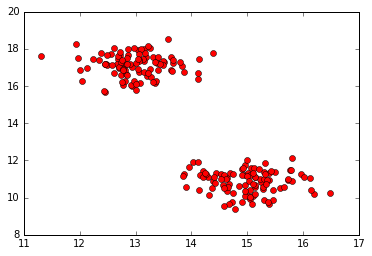

In [29]:
plt.plot(column(x_data_list, 0), column(x_data_list, 1), 'ro')
plt.show()

In [5]:
x_data = np.insert(x_data_list, 0, 1, axis=1)

# y <- np.array
y_data = np.array(y_data)
x_data = np.transpose(x_data)

print(x_data.shape)
# x_data

(3, 200)


In [6]:
y_data.shape

(200,)

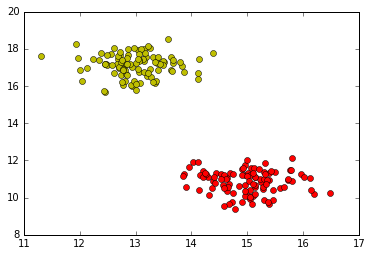

In [7]:
# 결과물을 표로 보고 싶다면
x_data_0 = [[v[0], v[1]] for v in vectors_set if v[2] == 0]
x_data_1 = [[v[0], v[1]] for v in vectors_set if v[2] == 1] 
plt.plot(column(x_data_0, 0), column(x_data_0, 1) , 'ro', label='Group1')
plt.plot(column(x_data_1, 0), column(x_data_1, 1) , 'yo', label='Group2')
plt.show()

In [8]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [9]:
print(len(x_data))
print(len(x_data[0]))

3
200


In [10]:
W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

In [11]:
h = tf.matmul(W, X)

In [12]:
hypo = tf.sigmoid(h)

In [13]:
cost = -tf.reduce_mean(Y*tf.log(hypo) + (1-Y)*tf.log(1.-hypo))

In [14]:
alpha = tf.Variable(0.01)

In [15]:
optimizer = tf.train.GradientDescentOptimizer(alpha)

In [16]:
train = optimizer.minimize(cost)

In [17]:
init = tf.initialize_all_variables()

In [18]:
sess = tf.Session()
sess.run(init)

for step in range(2000):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0:
        print("step :", step)
        print("cost :", sess.run(cost, feed_dict={X:x_data, Y:y_data}))
        print("W :", sess.run(W))
        print("="*50)
        # plt.plot(column(x_data_0, 0), column(x_data_0, 1) , 'ro', label='Group1')
        # plt.plot(column(x_data_1, 0), column(x_data_1, 1) , 'yo', label='Group2')
        # plt.plot(x_data, sess.run(hypo, feed_dict={X:x_data}), 'b-', label='hyper function')
        # plt.show()

step : 0
cost : 2.72868
W : [[ 0.46848771  0.30837494  0.03272241]]
step : 500
cost : 0.0316077
W : [[ 0.41509286 -0.91403306  0.88886899]]
step : 1000
cost : 0.0163247
W : [[ 0.40693891 -1.10589564  1.08035886]]
step : 1500
cost : 0.0111428
W : [[ 0.40200493 -1.21907985  1.19325817]]


In [19]:
def is_pass(predict_value):
    return predict_value > 0.5

In [20]:
test_x = np.reshape([1, 2, 15], [3,1])
p_value = sess.run(hypo, feed_dict={X:test_x})
print(p_value)
print(is_pass(p_value))

test_x = np.reshape([1, 20, 10], [3,1])
p_value = sess.run(hypo, feed_dict={X:test_x})
print(p_value)
print(is_pass(p_value))

[[ 1.]]
[[ True]]
[[  2.59802641e-06]]
[[False]]


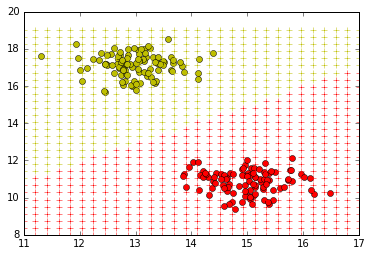

In [28]:
test_x1 = np.linspace(11, 17, 30)
test_x2 = np.linspace(8,19, 30)
# print(test_x2.shape)

test_x = [test_x1, test_x2]
step_x1 = 0
i = 0
plt.plot(column(x_data_0, 0), column(x_data_0, 1) , 'ro', label='Group1')
plt.plot(column(x_data_1, 0), column(x_data_1, 1) , 'yo', label='Group2')
for index in test_x1:
    lim_x1 = [index]*len(test_x2)
    test_x = [[1]*len(test_x2), lim_x1, test_x2]
    p_value = sess.run(hypo, feed_dict={X:test_x})
    lim=0
    for pass_bool in is_pass(p_value)[0]:
        if pass_bool == True:
            plt.plot(lim_x1[step_x1], test_x2[lim], 'y+')
        else:
            plt.plot(lim_x1[step_x1], test_x2[lim], 'r+')
        lim = lim + 1
    step_x1 = step_x1 + 1
    # i = i + 1
    # if i == 5:
    #     break
plt.show()

In [22]:
test_x = np.reshape([1, 12, 7], [3,1])
p_value = sess.run(hypo, feed_dict={X:test_x})
print(p_value)
print(is_pass(p_value))

[[ 0.00186379]]
[[False]]
